# Customer Support Intent Classification - Exploratory Data Analysis

This notebook contains a comprehensive exploratory data analysis of the Bitext Customer Service dataset for intent classification.

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import re

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [4]:
# Load training, validation, and testing datasets
train_df = pd.read_csv('../Data/Bitext_Sample_Customer_Service_Training_Dataset.csv')
val_df = pd.read_csv('../Data/Bitext_Sample_Customer_Service_Validation_Dataset.csv')
test_df = pd.read_csv('../Data/Bitext_Sample_Customer_Service_Testing_Dataset.csv')

print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")
print(f"Testing set size: {test_df.shape}")
print(f"\nTotal samples: {train_df.shape[0] + val_df.shape[0] + test_df.shape[0]}")

Training set size: (6539, 4)
Validation set size: (818, 4)
Testing set size: (818, 4)

Total samples: 8175


## 3. Dataset Overview

In [6]:
# Display first few rows
print("Training Dataset Sample:")
train_df.head(10)

Training Dataset Sample:


,utterance,intent,category,tags
0,would it be possible to cancel the order I made?,cancel_order,ORDER,BIP
1,cancelling order,cancel_order,ORDER,BK
2,I need assistance canceling the last order I h...,cancel_order,ORDER,B
3,problem with canceling the order I made,cancel_order,ORDER,B
4,I don't know how to cancel the order I made,cancel_order,ORDER,B
5,can you help me cancel the order I made?,cancel_order,ORDER,BI
6,I would like to know about order cancellations,cancel_order,ORDER,BMP
7,could you help me cancelling an order?,cancel_order,ORDER,BIP
8,I don't know how to cancel an order I made,cancel_order,ORDER,B
9,help me cancelling my last order,cancel_order,ORDER,B


In [7]:
# Dataset information
print("Training Dataset Info:")
print(train_df.info())
print("\n" + "="*50 + "\n")
print("Column Names:", train_df.columns.tolist())
print("\nData Types:")
print(train_df.dtypes)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  6539 non-null   object
 1   intent     6539 non-null   object
 2   category   6539 non-null   object
 3   tags       6539 non-null   object
dtypes: object(4)
memory usage: 204.5+ KB
None


Column Names: ['utterance', 'intent', 'category', 'tags']

Data Types:
utterance    object
intent       object
category     object
tags         object
dtype: object


In [8]:
# Check for missing values
print("Missing Values in Training Set:")
print(train_df.isnull().sum())
print("\nMissing Values in Validation Set:")
print(val_df.isnull().sum())
print("\nMissing Values in Testing Set:")
print(test_df.isnull().sum())

Missing Values in Training Set:
utterance    0
intent       0
category     0
tags         0
dtype: int64

Missing Values in Validation Set:
utterance    0
intent       0
category     0
tags         0
dtype: int64

Missing Values in Testing Set:
utterance    0
intent       0
category     0
tags         0
dtype: int64


## 4. Intent Analysis

In [9]:
# Unique intents
print("Number of unique intents in training set:", train_df['intent'].nunique())
print("\nAll unique intents:")
print(train_df['intent'].unique())

Number of unique intents in training set: 27

All unique intents:
['cancel_order' 'change_order' 'change_shipping_address'
 'check_cancellation_fee' 'check_invoice' 'check_payment_methods'
 'check_refund_policy' 'complaint' 'contact_customer_service'
 'contact_human_agent' 'create_account' 'delete_account'
 'delivery_options' 'delivery_period' 'edit_account' 'get_invoice'
 'get_refund' 'newsletter_subscription' 'payment_issue' 'place_order'
 'recover_password' 'registration_problems' 'review'
 'set_up_shipping_address' 'switch_account' 'track_order' 'track_refund']


In [16]:
# Intent distribution
intent_counts = train_df['intent'].value_counts()
print("Intent Distribution:")
print(intent_counts)
print(len(intent_counts))
print(f"\nMost common intent: {intent_counts.index[0]} ({intent_counts.iloc[0]} samples)")
print(f"Least common intent: {intent_counts.index[-1]} ({intent_counts.iloc[-1]} samples)")

Intent Distribution:
intent
get_invoice                 268
payment_issue               263
check_invoice               258
contact_customer_service    253
complaint                   252
review                      248
check_payment_methods       246
set_up_shipping_address     246
check_cancellation_fee      246
cancel_order                246
track_order                 245
place_order                 243
check_refund_policy         240
get_refund                  239
registration_problems       239
track_refund                239
recover_password            239
newsletter_subscription     238
create_account              237
delivery_period             236
delete_account              236
delivery_options            236
edit_account                233
change_order                232
change_shipping_address     228
switch_account              228
contact_human_agent         225
Name: count, dtype: int64
27

Most common intent: get_invoice (268 samples)
Least common intent: contact_hum

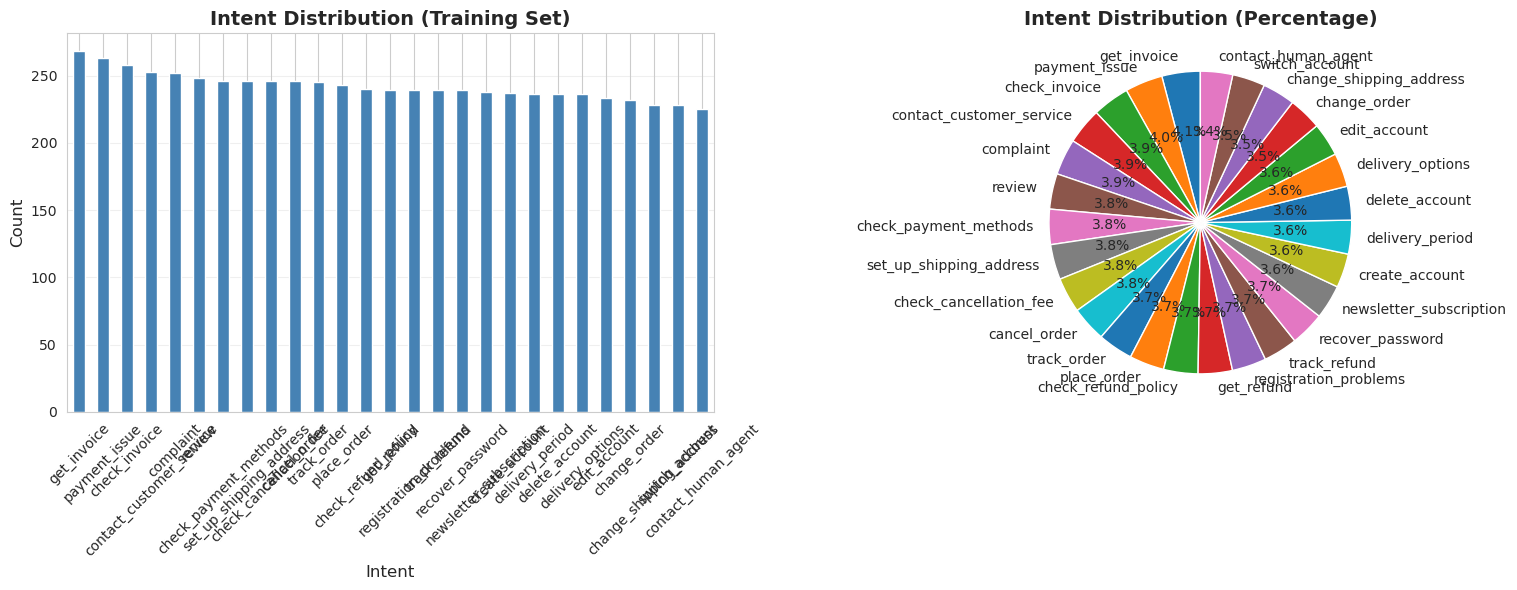

In [11]:
# Visualize intent distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
intent_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Intent Distribution (Training Set)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Intent', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Intent Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Category Analysis

In [12]:
# Unique categories
print("Number of unique categories:", train_df['category'].nunique())
print("\nAll unique categories:")
print(train_df['category'].unique())

# Category distribution
category_counts = train_df['category'].value_counts()
print("\nCategory Distribution:")
print(category_counts)

Number of unique categories: 11

All unique categories:
['ORDER' 'SHIPPING_ADDRESS' 'CANCELLATION_FEE' 'INVOICE' 'PAYMENT'
 'REFUND' 'FEEDBACK' 'CONTACT' 'ACCOUNT' 'DELIVERY' 'NEWSLETTER']

Category Distribution:
category
ACCOUNT             1412
ORDER                966
REFUND               718
INVOICE              526
PAYMENT              509
FEEDBACK             500
CONTACT              478
SHIPPING_ADDRESS     474
DELIVERY             472
CANCELLATION_FEE     246
NEWSLETTER           238
Name: count, dtype: int64


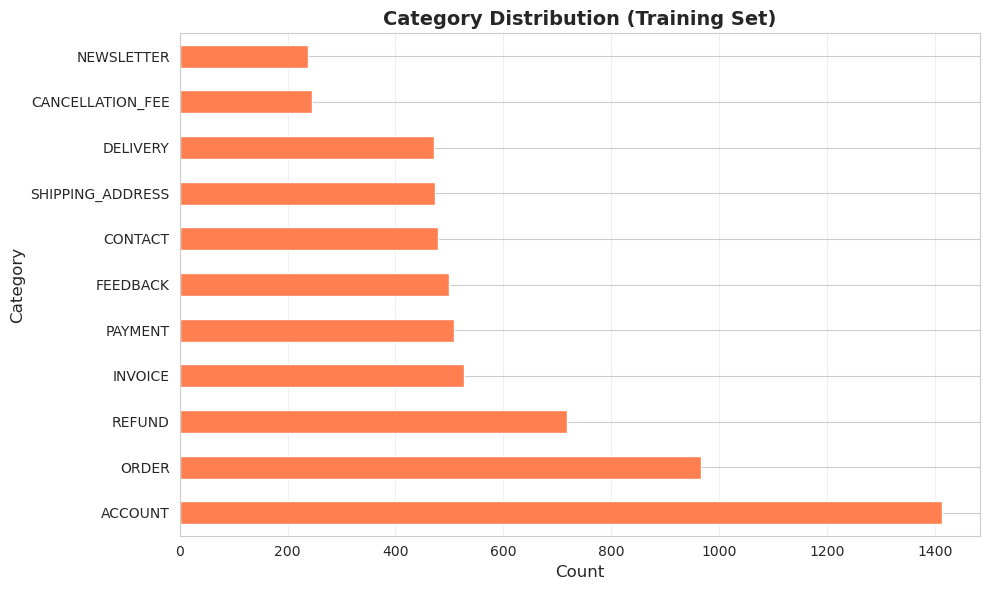

In [13]:
# Visualize category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color='coral')
plt.title('Category Distribution (Training Set)', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# Intent-Category relationship
intent_category = train_df.groupby(['category', 'intent']).size().reset_index(name='count')
print("Intent-Category Mapping:")
print(intent_category)

Intent-Category Mapping:
            category                    intent  count
0            ACCOUNT            create_account    237
1            ACCOUNT            delete_account    236
2            ACCOUNT              edit_account    233
3            ACCOUNT          recover_password    239
4            ACCOUNT     registration_problems    239
5            ACCOUNT            switch_account    228
6   CANCELLATION_FEE    check_cancellation_fee    246
7            CONTACT  contact_customer_service    253
8            CONTACT       contact_human_agent    225
9           DELIVERY          delivery_options    236
10          DELIVERY           delivery_period    236
11          FEEDBACK                 complaint    252
12          FEEDBACK                    review    248
13           INVOICE             check_invoice    258
14           INVOICE               get_invoice    268
15        NEWSLETTER   newsletter_subscription    238
16             ORDER              cancel_order    246
17 

## 6. Text Analysis (Utterances)

In [17]:
# Text length statistics
train_df['text_length'] = train_df['utterance'].apply(len)
train_df['word_count'] = train_df['utterance'].apply(lambda x: len(str(x).split()))

print("Text Length Statistics:")
print(train_df['text_length'].describe())
print("\nWord Count Statistics:")
print(train_df['word_count'].describe())

Text Length Statistics:
count    6539.000000
mean       42.554366
std        10.618668
min         6.000000
25%        35.000000
50%        43.000000
75%        51.000000
max        60.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    6539.000000
mean        8.318244
std         2.404325
min         1.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        15.000000
Name: word_count, dtype: float64


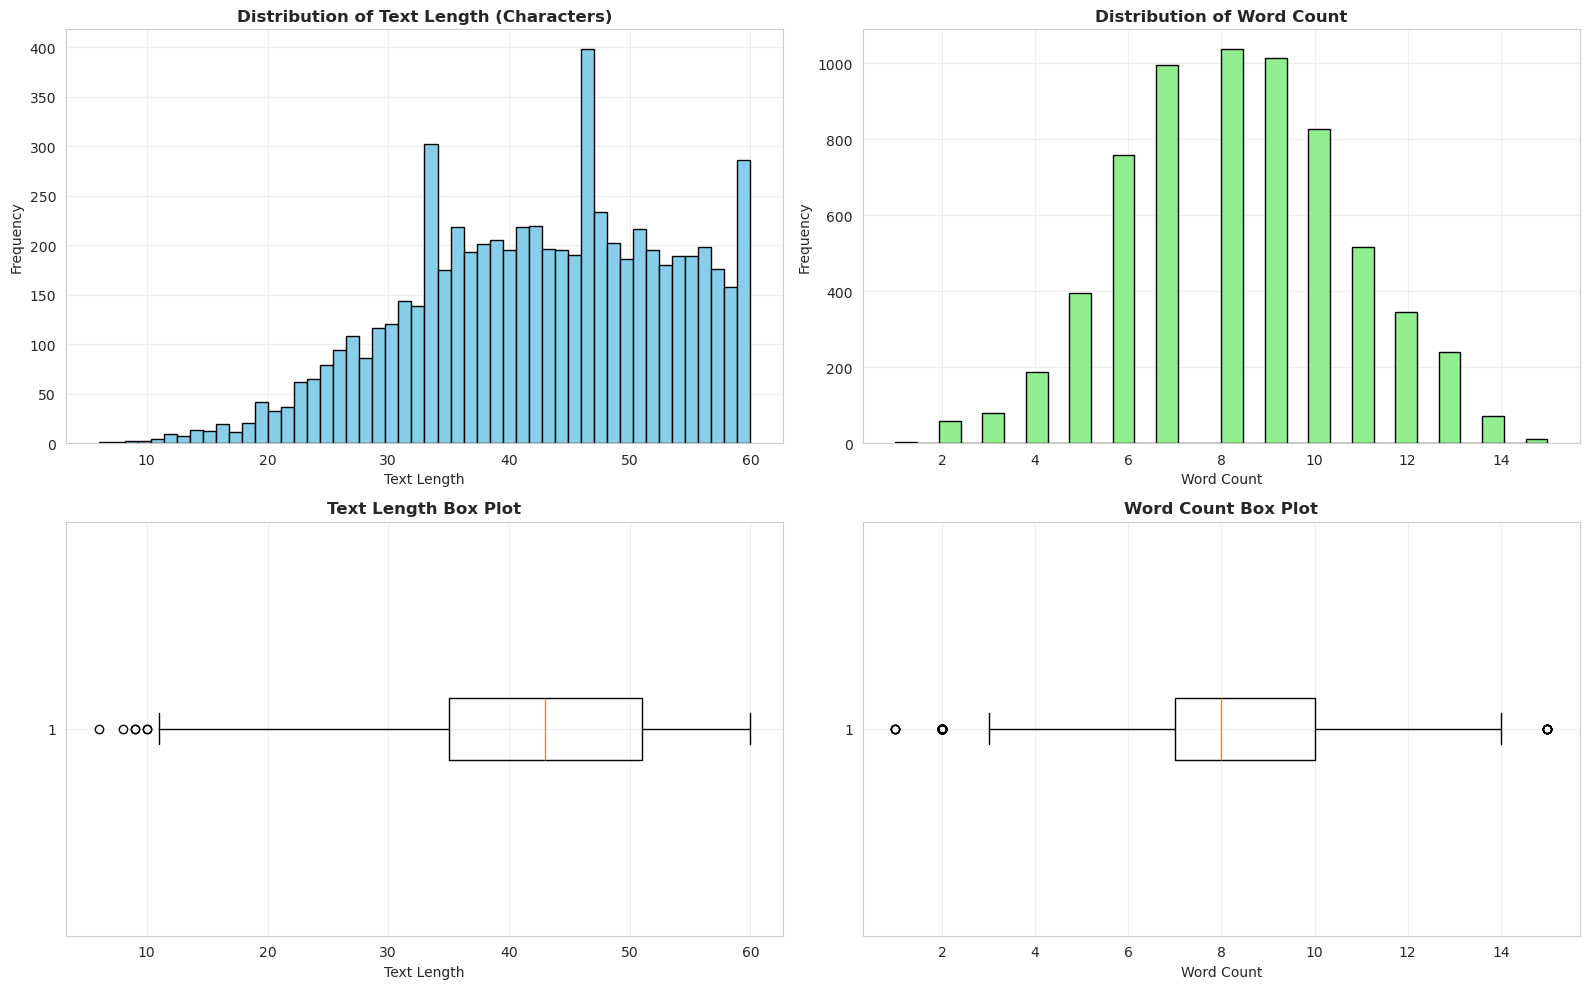

In [18]:
# Visualize text length and word count distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Text length distribution
axes[0, 0].hist(train_df['text_length'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Text Length (Characters)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Text Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Word count distribution
axes[0, 1].hist(train_df['word_count'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Word Count', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# Box plot for text length
axes[1, 0].boxplot(train_df['text_length'], vert=False)
axes[1, 0].set_title('Text Length Box Plot', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Text Length')
axes[1, 0].grid(alpha=0.3)

# Box plot for word count
axes[1, 1].boxplot(train_df['word_count'], vert=False)
axes[1, 1].set_title('Word Count Box Plot', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Average text length and word count by intent
avg_by_intent = train_df.groupby('intent').agg({
    'text_length': 'mean',
    'word_count': 'mean'
}).round(2).sort_values('word_count', ascending=False)

print("Average Text Statistics by Intent:")
print(avg_by_intent)

Average Text Statistics by Intent:
                          text_length  word_count
intent                                           
delivery_period                 48.56        9.57
check_refund_policy             46.20        9.53
check_invoice                   44.86        9.06
contact_customer_service        49.63        9.03
set_up_shipping_address         46.72        9.00
delivery_options                49.07        8.97
edit_account                    44.39        8.91
track_refund                    42.20        8.91
review                          43.44        8.75
get_invoice                     42.44        8.74
check_payment_methods           48.63        8.71
complaint                       44.54        8.25
newsletter_subscription         50.45        8.05
cancel_order                    40.91        8.04
delete_account                  41.62        8.01
create_account                  39.00        7.97
track_order                     35.34        7.96
change_shipping

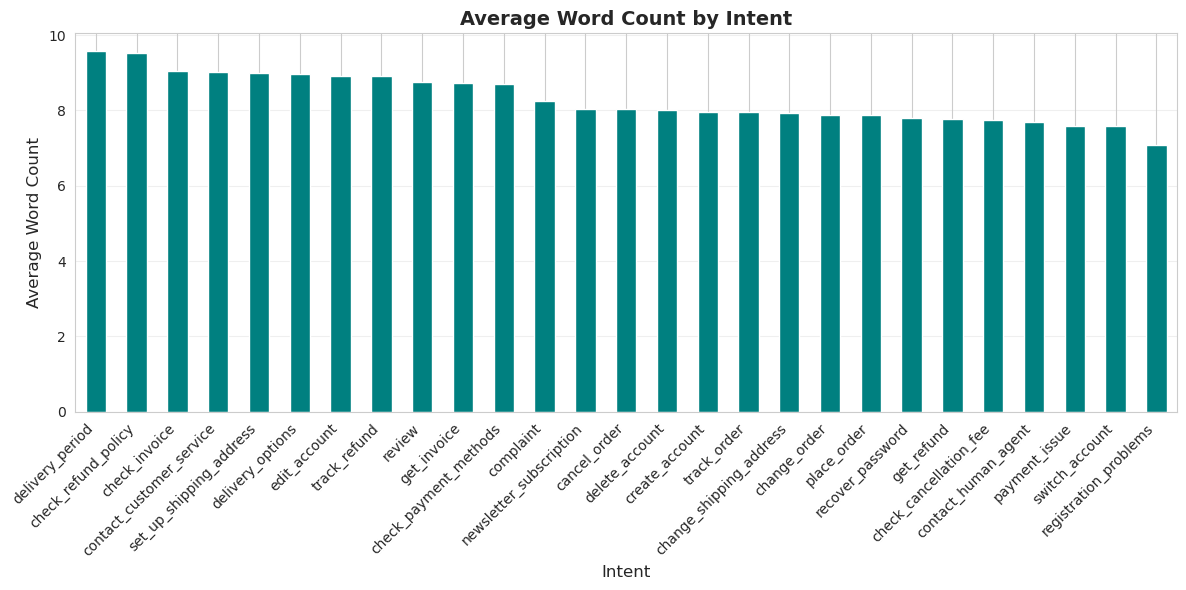

In [20]:
# Visualize average word count by intent
plt.figure(figsize=(12, 6))
avg_by_intent['word_count'].plot(kind='bar', color='teal')
plt.title('Average Word Count by Intent', fontsize=14, fontweight='bold')
plt.xlabel('Intent', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Sample Utterances by Intent

In [22]:
# Display sample utterances for each intent
for intent in train_df['intent'].unique():
    print(f"\n{'='*80}")
    print(f"Intent: {intent}")
    print(f"Category: {train_df[train_df['intent']==intent]['category'].iloc[0]}")
    print(f"{'='*80}")
    samples = train_df[train_df['intent'] == intent]['utterance'].head(5).tolist()
    for i, sample in enumerate(samples, 1):
        print(f"{i}. {sample}")


Intent: cancel_order
Category: ORDER
1. would it be possible to cancel the order I made?
2. cancelling order
3. I need assistance canceling the last order I have made
4. problem with canceling the order I made
5. I don't know how to cancel the order I made

Intent: change_order
Category: ORDER
1. problems with adding an item to an order
2. I don't know how I can add an item
3. I have a question about changing my orders
4. how can I change something of an order?
5. I want help changing the order I made

Intent: change_shipping_address
Category: SHIPPING_ADDRESS
1. I want help to change the shipping address
2. I need to change the shipping address
3. I do not know how to change my shipping address
4. could you tell me more about changing my shipping address?
5. need help trying to modify my shipping address

Intent: check_cancellation_fee
Category: CANCELLATION_FEE
1. cancellation fee
2. I want assistance to check the withdrawal fee
3. want assistance to check the cancellation charge
4.

## 9. Dataset Split Comparison

In [23]:
# Compare intent distribution across splits
print("Intent Distribution Comparison:\n")
comparison_df = pd.DataFrame({
    'Train': train_df['intent'].value_counts(),
    'Validation': val_df['intent'].value_counts(),
    'Test': test_df['intent'].value_counts()
}).fillna(0).astype(int)

print(comparison_df)

# Calculate percentages
total_train = len(train_df)
total_val = len(val_df)
total_test = len(test_df)

print(f"\nDataset Split Percentages:")
print(f"Train: {total_train} ({total_train/(total_train+total_val+total_test)*100:.1f}%)")
print(f"Validation: {total_val} ({total_val/(total_train+total_val+total_test)*100:.1f}%)")
print(f"Test: {total_test} ({total_test/(total_train+total_val+total_test)*100:.1f}%)")

Intent Distribution Comparison:

                          Train  Validation  Test
intent                                           
cancel_order                246          34    25
change_order                232          33    39
change_shipping_address     228          28    41
check_cancellation_fee      246          26    26
check_invoice               258          35    31
check_payment_methods       246          25    26
check_refund_policy         240          25    37
complaint                   252          23    23
contact_customer_service    253          22    24
contact_human_agent         225          30    42
create_account              237          36    25
delete_account              236          33    29
delivery_options            236          34    32
delivery_period             236          27    38
edit_account                233          26    35
get_invoice                 268          25    31
get_refund                  239          27    28
newsletter_subscr

In [ ]:
# Visualize split distribution
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax, width=0.8)
plt.title('Intent Distribution Across Train/Validation/Test Sets', fontsize=14, fontweight='bold')
plt.xlabel('Intent', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Common Words Analysis

In [24]:
# Extract all words
all_words = []
for utterance in train_df['utterance']:
    words = str(utterance).lower().split()
    all_words.extend(words)

# Count most common words
word_freq = Counter(all_words)
most_common = word_freq.most_common(30)

print("30 Most Common Words:")
for word, count in most_common:
    print(f"{word}: {count}")

30 Most Common Words:
i: 4830
to: 3900
the: 1723
help: 1674
a: 1294
do: 1284
my: 1238
me: 1167
can: 1164
how: 1115
check: 1013
what: 948
need: 871
know: 834
you: 807
assistance: 710
could: 662
want: 658
have: 633
an: 629
account: 570
your: 551
order: 533
get: 456
not: 452
with: 451
for: 441
of: 428
shipping: 410
about: 399


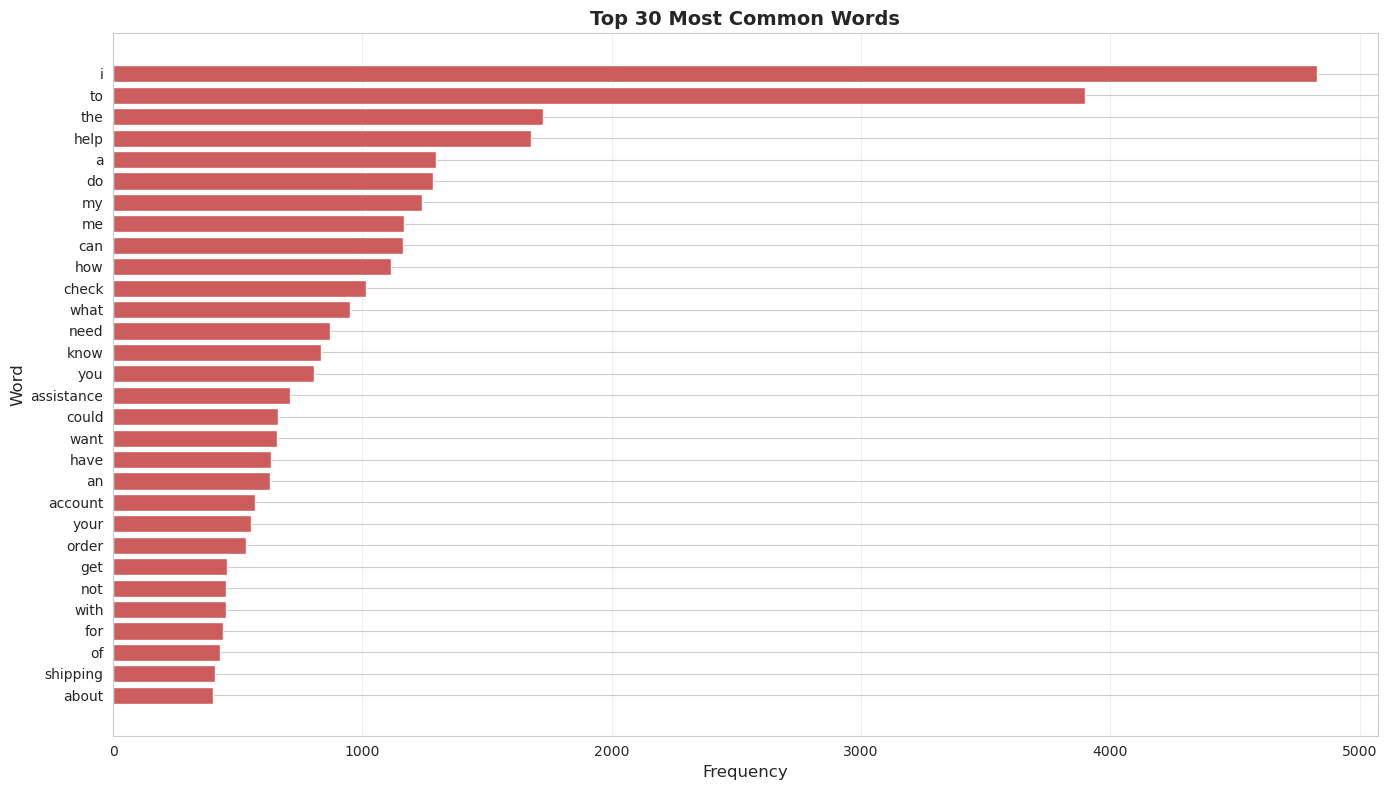

In [25]:
# Visualize most common words
words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(14, 8))
plt.barh(words_df['Word'], words_df['Frequency'], color='indianred')
plt.gca().invert_yaxis()
plt.title('Top 30 Most Common Words', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Key Insights and Summary

In [27]:
# Summary statistics
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)
print(f"\n📊 Dataset Information:")
print(f"   • Total samples: {len(train_df) + len(val_df) + len(test_df)}")
print(f"   • Training samples: {len(train_df)}")
print(f"   • Validation samples: {len(val_df)}")
print(f"   • Test samples: {len(test_df)}")

print(f"\n🎯 Intent & Category Information:")
print(f"   • Number of unique intents: {train_df['intent'].nunique()}")
print(f"   • Number of unique categories: {train_df['category'].nunique()}")
print(f"   • Most common intent: {train_df['intent'].value_counts().index[0]} ({train_df['intent'].value_counts().iloc[0]} samples)")

print(f"\n📝 Text Statistics:")
print(f"   • Average text length: {train_df['text_length'].mean():.1f} characters")
print(f"   • Average word count: {train_df['word_count'].mean():.1f} words")
print(f"   • Min word count: {train_df['word_count'].min()}")
print(f"   • Max word count: {train_df['word_count'].max()}")


print(f"\n✅ Data Quality:")
print(f"   • Missing values in training set: {train_df.isnull().sum().sum()}")
print(f"   • Missing values in validation set: {val_df.isnull().sum().sum()}")
print(f"   • Missing values in test set: {test_df.isnull().sum().sum()}")

print(f"\n{'='*80}")

EXPLORATORY DATA ANALYSIS SUMMARY

📊 Dataset Information:
   • Total samples: 8175
   • Training samples: 6539
   • Validation samples: 818
   • Test samples: 818

🎯 Intent & Category Information:
   • Number of unique intents: 27
   • Number of unique categories: 11
   • Most common intent: get_invoice (268 samples)

📝 Text Statistics:
   • Average text length: 42.6 characters
   • Average word count: 8.3 words
   • Min word count: 1
   • Max word count: 15

✅ Data Quality:
   • Missing values in training set: 0
   • Missing values in validation set: 0
   • Missing values in test set: 0

